# Import Modules

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Dataset

In [2]:
data= pd.read_csv('QL_train.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data1 = DataFrame({'Data Type':data.dtypes,'Missing values':data.isnull().sum(),'Unique values':data.nunique()})

In [8]:
data1

,Data Type,Missing values,Unique values
Loan_ID,object,0,614
Gender,object,13,2
Married,object,3,2
Dependents,object,15,4
Education,object,0,2
Self_Employed,object,32,2
ApplicantIncome,int64,0,505
CoapplicantIncome,float64,0,287
LoanAmount,float64,22,203
Loan_Amount_Term,float64,14,10


# Preprocessing the dataset

In [9]:
# find the null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# fill the missing values for categorical terms - mode

In [11]:
data.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
data.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [13]:
data['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [14]:
data['Gender']=data['Gender'].fillna(data['Gender'].mode()[0])
data['Married']=data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'].replace('3+',3,inplace=True)
data['Dependents']=data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed']=data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Credit_History']=data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [15]:
# filling the missing values for numerical terms - Mean
               
data['LoanAmount']=data['LoanAmount'].fillna(data['LoanAmount'].mean())  
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [16]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis

### Unvarite Data Analysis

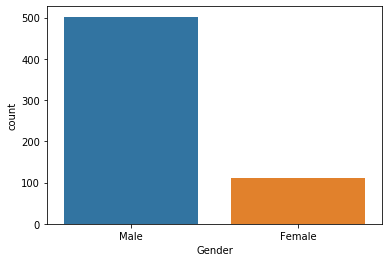

In [17]:
# categorical attributes visualization
sns.countplot(data['Gender'])
plt.show()

In [18]:
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

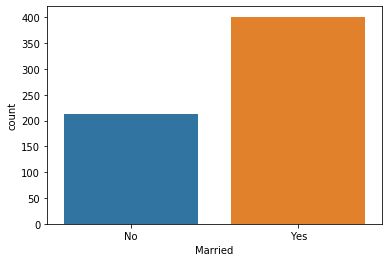

In [19]:
sns.countplot(data['Married'])
plt.show()

In [20]:
data['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

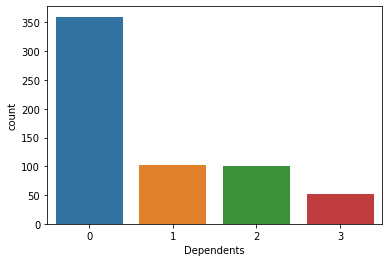

In [21]:
sns.countplot(data['Dependents'])
plt.show()

In [22]:
data['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

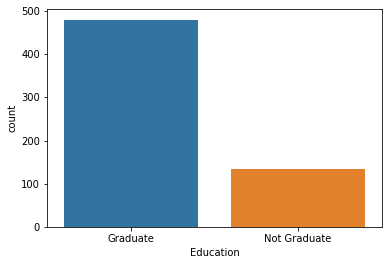

In [23]:
sns.countplot(data['Education'])
plt.show()

In [24]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

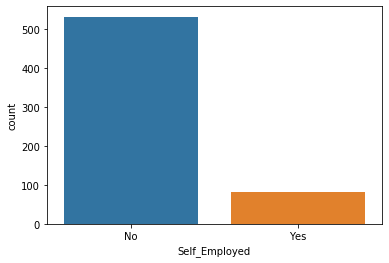

In [25]:
sns.countplot(data['Self_Employed'])
plt.show()

In [26]:
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

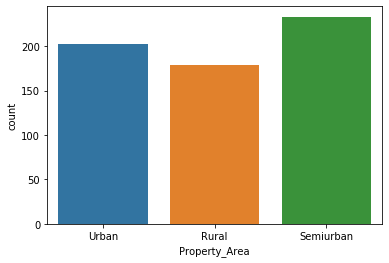

In [27]:
sns.countplot(data['Property_Area'])
plt.show()

In [28]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

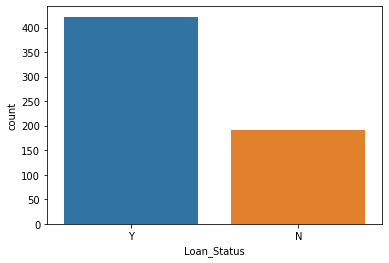

In [29]:
sns.countplot(data['Loan_Status'])
plt.show()

In [30]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

### Bivariate Data Analysis

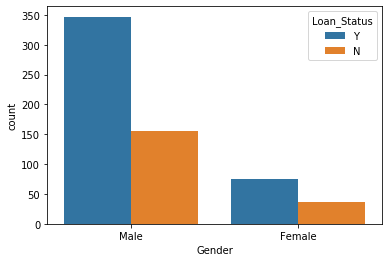

In [31]:
sns.countplot(data['Gender'],hue=data['Loan_Status'])
plt.show()

In [32]:
B1=pd.crosstab(data['Gender'],data['Loan_Status'])
B1

Loan_Status,N,Y
Gender,,
Female,37,75
Male,155,347


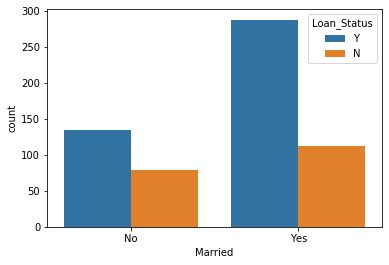

In [33]:
sns.countplot(data['Married'],hue=data['Loan_Status'])
plt.show()

In [34]:
B1=pd.crosstab(data['Married'],data['Loan_Status'])
B1

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


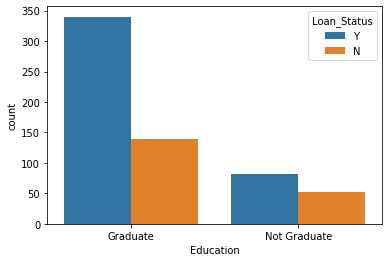

In [35]:
sns.countplot(data['Education'],hue=data['Loan_Status'])
plt.show()

In [36]:
B1=pd.crosstab(data['Education'],data['Loan_Status'])
B1

Loan_Status,N,Y
Education,,
Graduate,140,340
Not Graduate,52,82


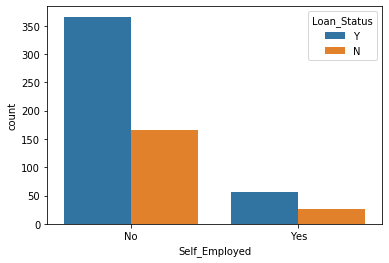

In [37]:
sns.countplot(data['Self_Employed'],hue=data['Loan_Status'])
plt.show()

In [38]:
B1=pd.crosstab(data['Self_Employed'],data['Loan_Status'])
B1

Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


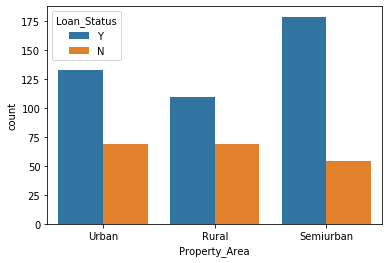

In [39]:
sns.countplot(data['Property_Area'],hue=data['Loan_Status'])
plt.show()

In [40]:
B1=pd.crosstab(data['Property_Area'],data['Loan_Status'])
B1

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


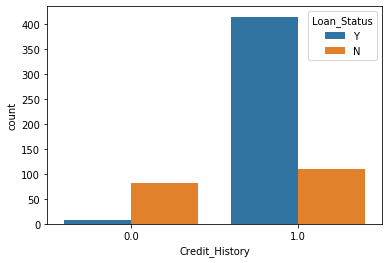

In [41]:
sns.countplot(data['Credit_History'],hue=data['Loan_Status'])
plt.show()

In [42]:
B1=pd.crosstab(data['Credit_History'],data['Loan_Status'])
B1

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,110,415


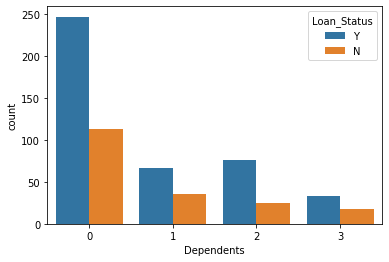

In [43]:
sns.countplot(data['Dependents'],hue=data['Loan_Status'])
plt.show()

In [44]:
B1=pd.crosstab(data['Dependents'],data['Loan_Status'])
B1

Loan_Status,N,Y
Dependents,,
3,18,33
0,113,247
1,36,66
2,25,76


## Numerical attributes visualization

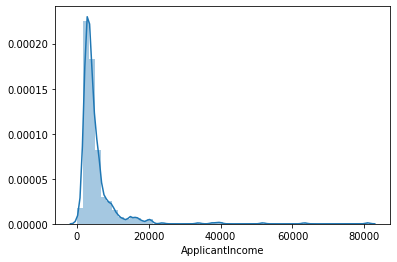

In [45]:
sns.distplot(data['ApplicantIncome'])
plt.show()

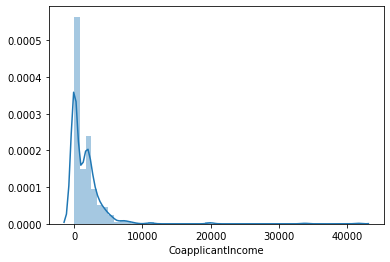

In [46]:
sns.distplot(data['CoapplicantIncome'])
plt.show()

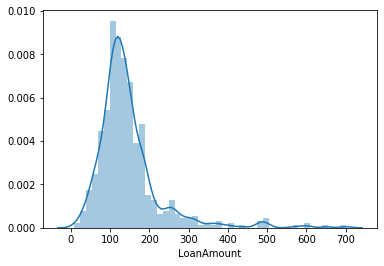

In [47]:
sns.distplot(data['LoanAmount'])
plt.show()

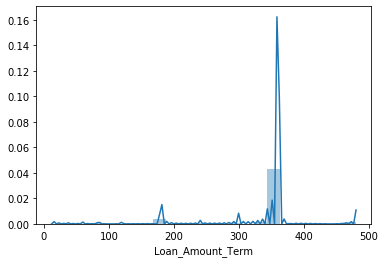

In [48]:
sns.distplot(data['Loan_Amount_Term'])
plt.show()

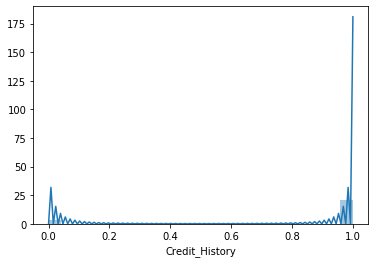

In [49]:
sns.distplot(data['Credit_History'])
plt.show()

### Creation of new attributes

In [50]:
# total income
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


### Log transformation

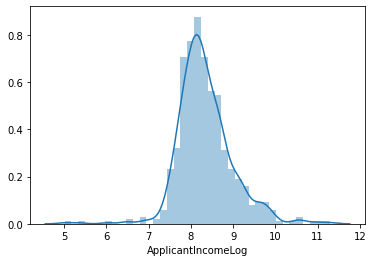

In [51]:
# apply log transformation to the attribute
data['ApplicantIncomeLog'] = np.log(data['ApplicantIncome'])
sns.distplot(data['ApplicantIncomeLog'])
plt.show()

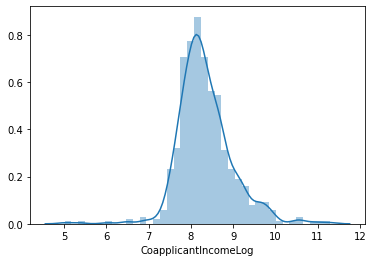

In [52]:
data['CoapplicantIncomeLog'] = np.log(data['ApplicantIncome'])
sns.distplot(data['CoapplicantIncomeLog'])
plt.show()

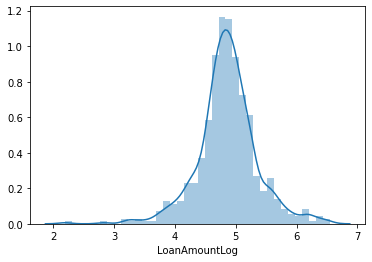

In [53]:
data['LoanAmountLog'] = np.log(data['LoanAmount'])
sns.distplot(data['LoanAmountLog'])
plt.show()

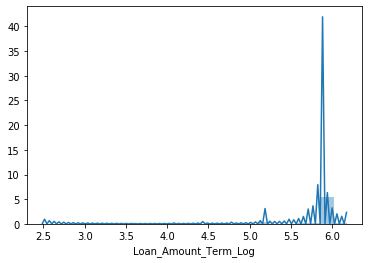

In [54]:
data['Loan_Amount_Term_Log'] = np.log(data['Loan_Amount_Term'])
sns.distplot(data['Loan_Amount_Term_Log'])
plt.show()

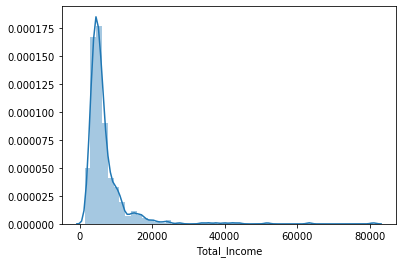

In [55]:
sns.distplot(data['Total_Income'])
plt.show()

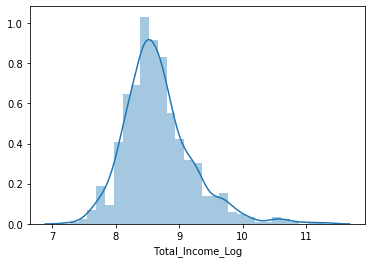

In [56]:
data['Total_Income_Log'] = np.log(data['Total_Income'])
sns.distplot(data['Total_Income_Log'])
plt.show()

### Corelation Matrix

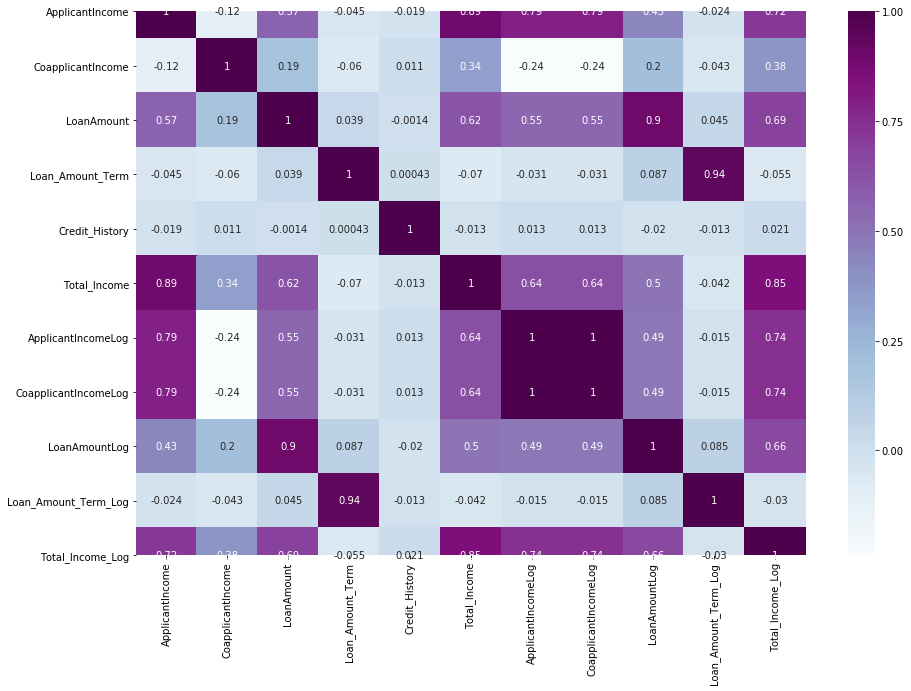

In [57]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True , cmap="BuPu")

In [58]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,8.674026,4.986426,5.886104,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,8.430109,4.852030,5.886104,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,8.006368,4.189655,5.886104,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,7.856707,4.787492,5.886104,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,8.699515,4.948760,5.886104,8.699515


In [59]:
# drop unecessary columns
cols =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID','CoapplicantIncomeLog']
data=data.drop(columns=cols, axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,5.886104,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


### Label Encoding

In [60]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in cols:
    data[col]=le.fit_transform(data[col])

In [61]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,0,0,0,0,1.0,2,1,8.674026,4.986426,5.886104,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,4.852030,5.886104,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,4.189655,5.886104,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,4.787492,5.886104,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,4.948760,5.886104,8.699515


### Train-Test Split

In [62]:
X = data.drop(columns=['Loan_Status'],axis=1)
y=data['Loan_Status']

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_tain,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

### Model Training

In [64]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
    x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)
    model.fit(x_train,y_train)
    print("Accuracy is", model.score(x_test,y_test)*100)
    score = cross_val_score(model,x,y,cv=5)
    print("Cross validation is",np.mean(score)*100)
    

##### Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model,X,y)

C:\Users\Rahul Singh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy is 77.27272727272727
Cross validation is 80.9462881514061


most of the time we need to give more importance to cross validation because its like a better version of accuracy, it will split the data into multipe part of data instead single part.

cross validation give overall performance 

##### DecisionTreeClassifier

In [66]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model,X,y)

Accuracy is 72.72727272727273
Cross validation is 70.68505930960949


##### RandomForestClassifier

In [67]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model,X,y)

Accuracy is 77.92207792207793
Cross validation is 78.66853258696523


In [68]:
model = ExtraTreesClassifier()
classify(model,X,y)

Accuracy is 75.32467532467533
Cross validation is 76.87458349993335


##### KNeighborsClassifier

In [69]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
classify(model,X,y)

Accuracy is 72.72727272727273
Cross validation is 75.5684392909503


As we can see Logistic Regression and Randomforest are showing better accuracy over other performance

### Hyperparameter Tuning

In [70]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_dist ={"max_depth":[3,None],"min_samples_split":[2,3,4],"criterion":["gini","entropy"]}

In [71]:
RF = RandomForestClassifier()
forest_cv = RandomizedSearchCV(RF,param_dist,cv=5)

In [72]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [73]:
forest_cv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_split': [2, 3, 4]})

In [74]:
y_predict= forest_cv.predict(x_test)

In [75]:
forest_cv.best_params_

{'min_samples_split': 2, 'max_depth': 3, 'criterion': 'gini'}

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
score =accuracy_score(y_predict,y_test)
score*100

77.27272727272727

In [78]:
forest_cv.best_score_*100

82.17391304347827

In [85]:
from sklearn.metrics import confusion_matrix,classification_report

In [86]:
cm = confusion_matrix(y_predict,y_test)
cm

array([[21,  2],
       [33, 98]], dtype=int64)

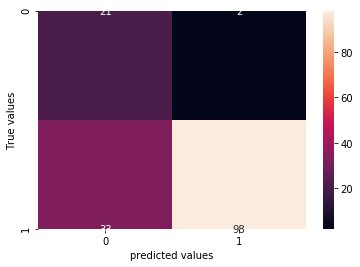

In [87]:
sns.heatmap(cm,annot=True)
plt.xlabel('predicted values')
plt.ylabel('True values')
plt.show()

In [88]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.39      0.91      0.55        23
           1       0.98      0.75      0.85       131

    accuracy                           0.77       154
   macro avg       0.68      0.83      0.70       154
weighted avg       0.89      0.77      0.80       154

